In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/scout_missings_filled_2.csv")
df.shape

(15915, 34)

## make_model fold < 900 models into closest model

In [3]:
df['make_model'].value_counts(dropna=False)

make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64

In [4]:
df['make_model'] = df['make_model'].replace('Audi A2', 'Audi A1')
df['make_model'] = df['make_model'].replace('Renault Duster', 'Renault Espace')
df['make_model'].value_counts(dropna=False)

make_model
Audi A3           3097
Audi A1           2615
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace    1025
Name: count, dtype: int64

## price outliers

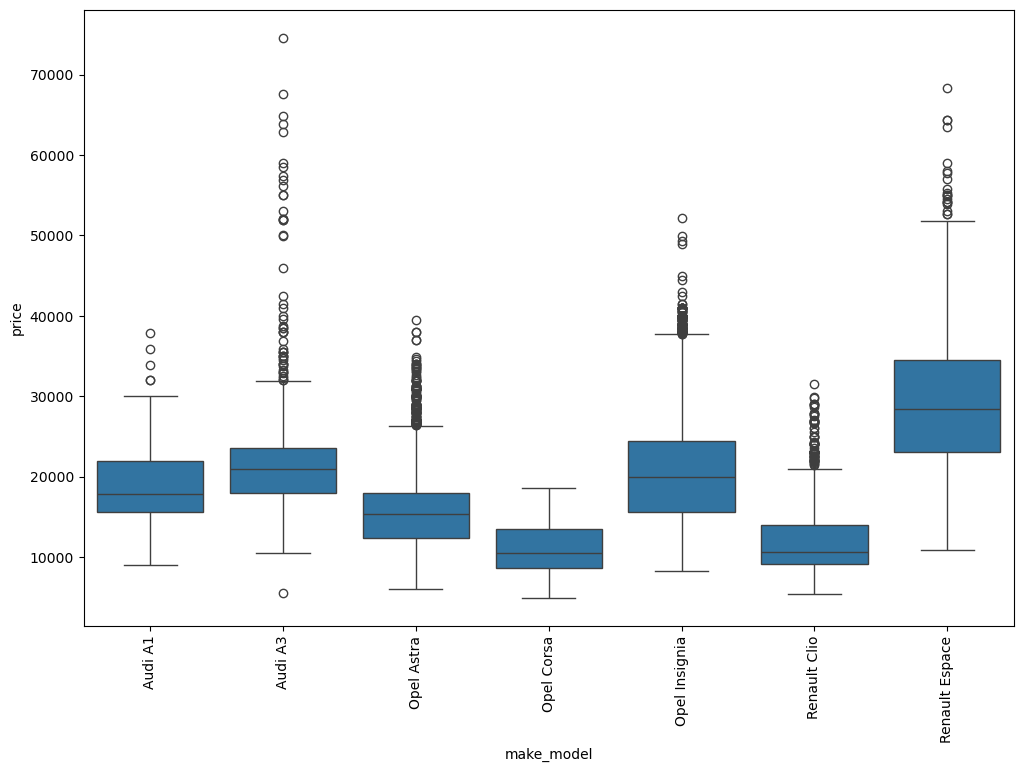

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='price', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()


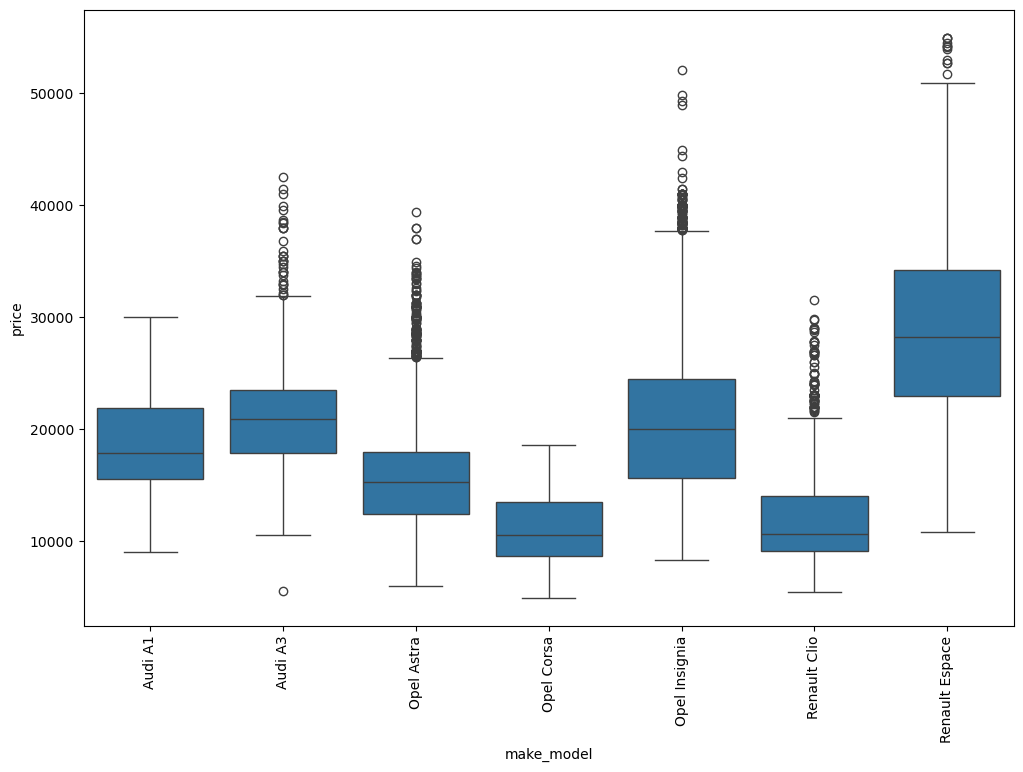

In [6]:
# Drop rows where make_model is 'Audi A3' and price is greater than 45000
df = df[~((df['make_model'] == 'Audi A3') & (df['price'] > 45000))]

# Drop rows where make_model is 'Audi A1' and price is greater than 30000
df = df[~((df['make_model'] == 'Audi A1') & (df['price'] > 30000))]

# Drop rows where make_model is 'Renault Espace' and price is greater than 55000
df = df[~((df['make_model'] == 'Renault Espace') & (df['price'] > 55000))]

# Plot Again...
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='price', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()


## Europe Value Added Tax

In [7]:
# no changes here
df.vat.value_counts(dropna=False)

vat
VAT deductible      10959
VAT undeductible     4497
Price negotiable      424
Name: count, dtype: int64

## km outliers

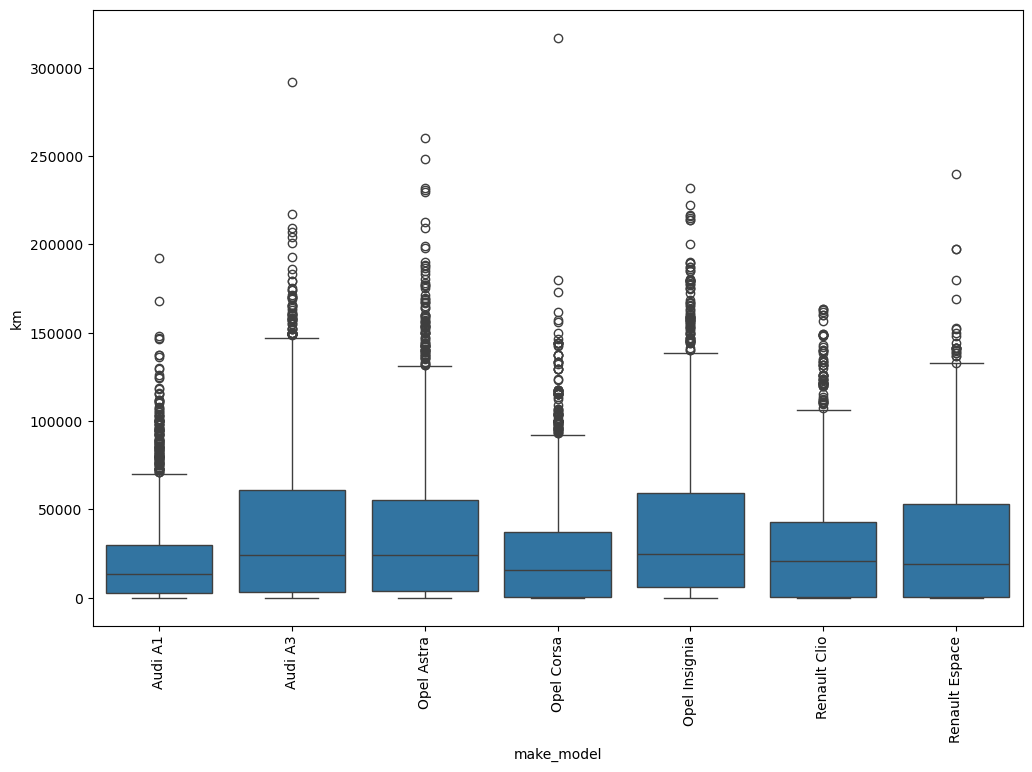

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='km', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()


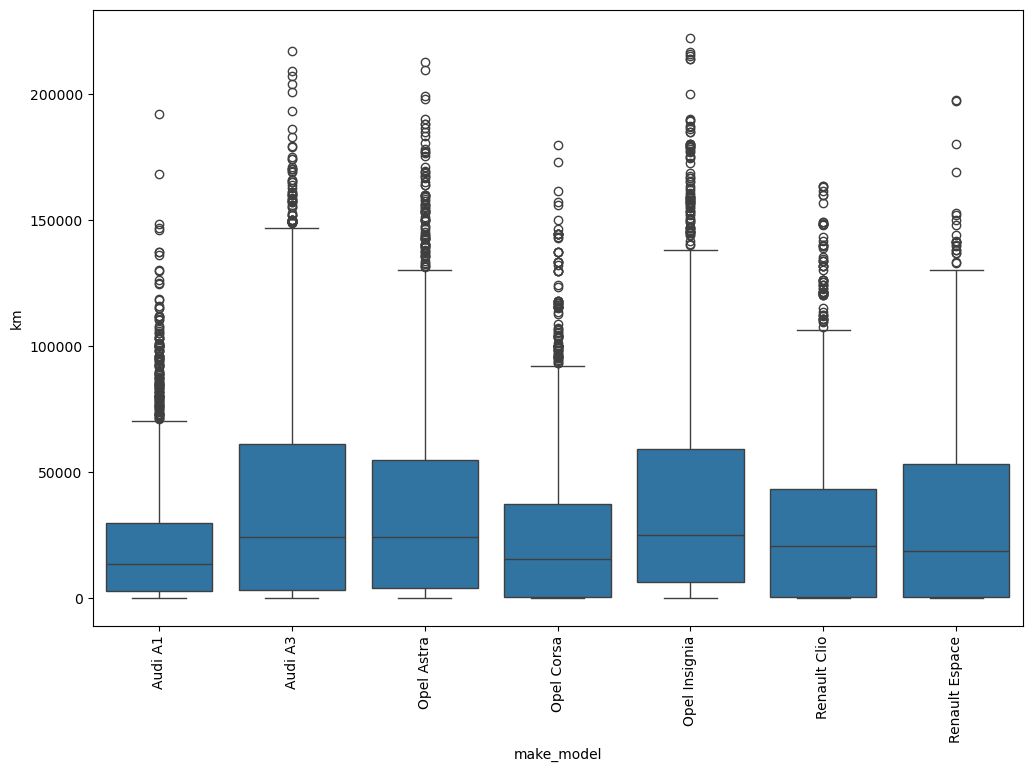

In [9]:
# Drop rows where 'km' is greater than 225000
df = df[~(df['km'] > 225000)]

# plot again
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='km', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()

## hp outliers

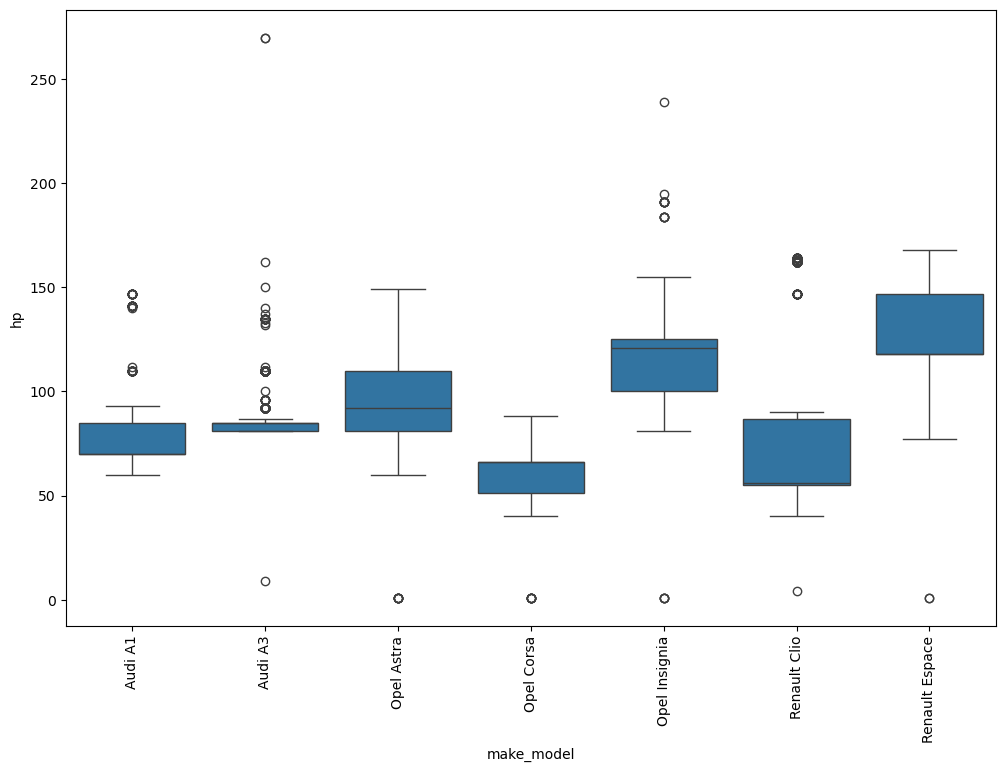

In [10]:
# box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='hp', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()

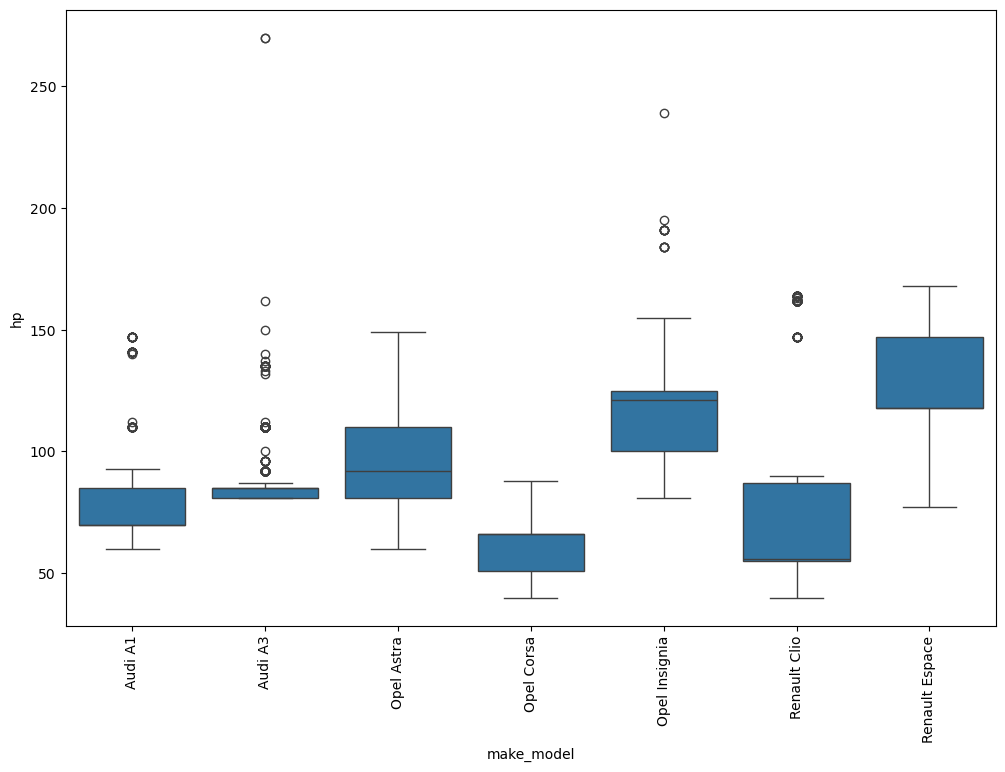

In [11]:
# Drop rows where 'hp' is less than 40
df = df[~(df['hp'] < 40)]

# plot again
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='hp', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()

## prev owner

In [12]:
df['prev_owner'].value_counts(dropna=False)

prev_owner
1.0    14213
0.0      840
2.0      777
3.0       17
4.0        2
Name: count, dtype: int64

In [13]:
# Create a new column 'owner_category' based on values in 'prev_owner'
df['prev_owner'] = df['prev_owner'].apply(lambda x: 'one_or_zero' if x <= 1 else 'greater_than_one')

# Check the result
df[['prev_owner']].value_counts()


prev_owner      
one_or_zero         15053
greater_than_one      796
Name: count, dtype: int64

## inspection new

In [14]:
# no change
df['inspection_new'].value_counts()

inspection_new
No     11917
Yes     3932
Name: count, dtype: int64

## warranty

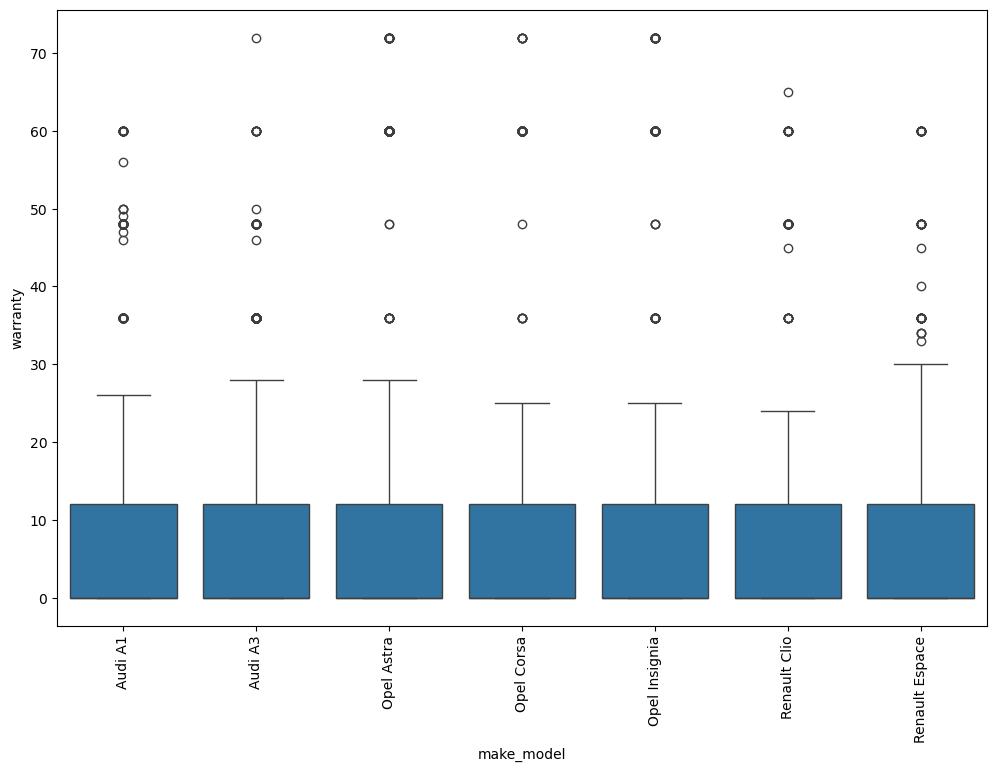

In [15]:
# plot again
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='warranty', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()

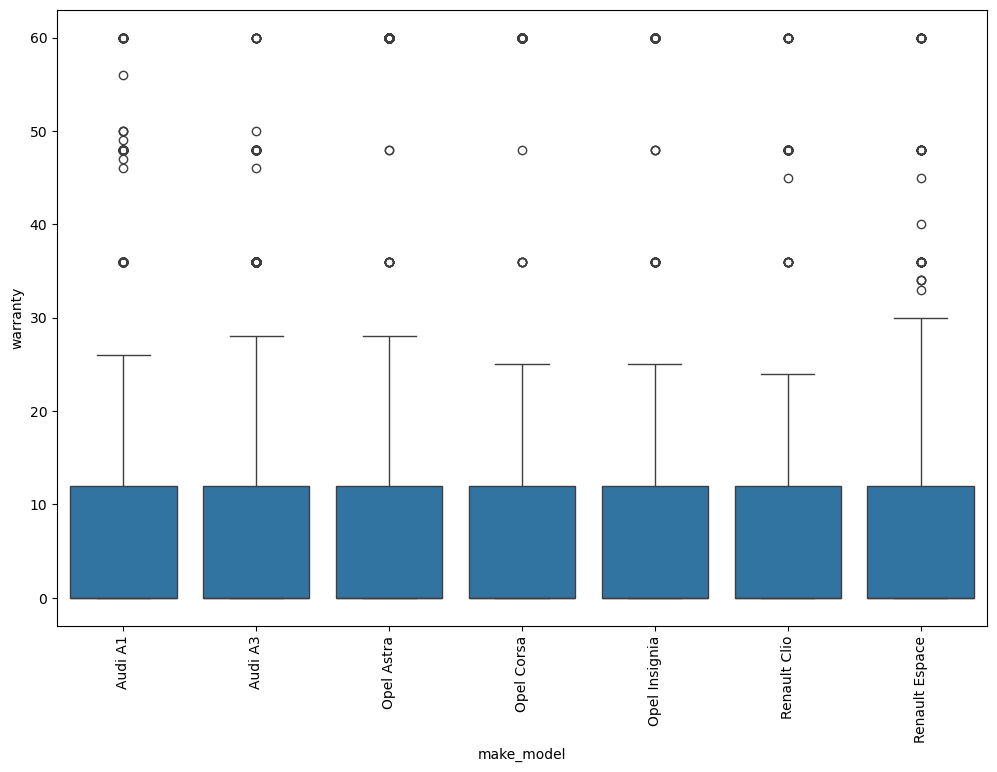

In [16]:
# Drop rows where 'warranty' is greater than 60
df = df[~(df['warranty'] > 60)]

# plot again
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='warranty', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()

## body_color

In [17]:
df['body_color'].value_counts()

body_color
Black     3906
Grey      3811
White     3447
Silver    1631
Blue      1415
Red        951
Brown      286
Green      158
Beige      107
Yellow      50
Violet      18
Bronze       6
Orange       3
Name: count, dtype: int64

In [18]:
# make Brown, Green, Beige, Yellow, Violet, Bronze, and Orange as 'Other' color
# List of colors to be replaced with 'Other'
colors_to_replace = ['Red', 'Brown', 'Green', 'Beige', 'Yellow', 'Violet', 'Bronze', 'Orange']

# Replace the specified colors with 'Other'
df['body_color'] = df['body_color'].replace(colors_to_replace, 'Other')

# Check the result
df['body_color'].value_counts()

body_color
Black     3906
Grey      3811
White     3447
Silver    1631
Other     1579
Blue      1415
Name: count, dtype: int64

## paint_type

In [19]:
df['paint_type'].value_counts()

paint_type
Metallic       15394
Uni/basic        389
Perl effect        6
Name: count, dtype: int64

In [20]:
# Define the logic for categorization
df['paint_type'] = df['paint_type'].apply(lambda x: 'Metallic' if x == 'Metallic' else 'Non_Metallic')

# Check the updated column
df['paint_type'].value_counts()

paint_type
Metallic        15394
Non_Metallic      395
Name: count, dtype: int64

## nr_of_doors

In [21]:
df['nr_of_doors'].value_counts()

nr_of_doors
5.0    11673
4.0     3070
3.0      826
2.0      218
1.0        1
7.0        1
Name: count, dtype: int64

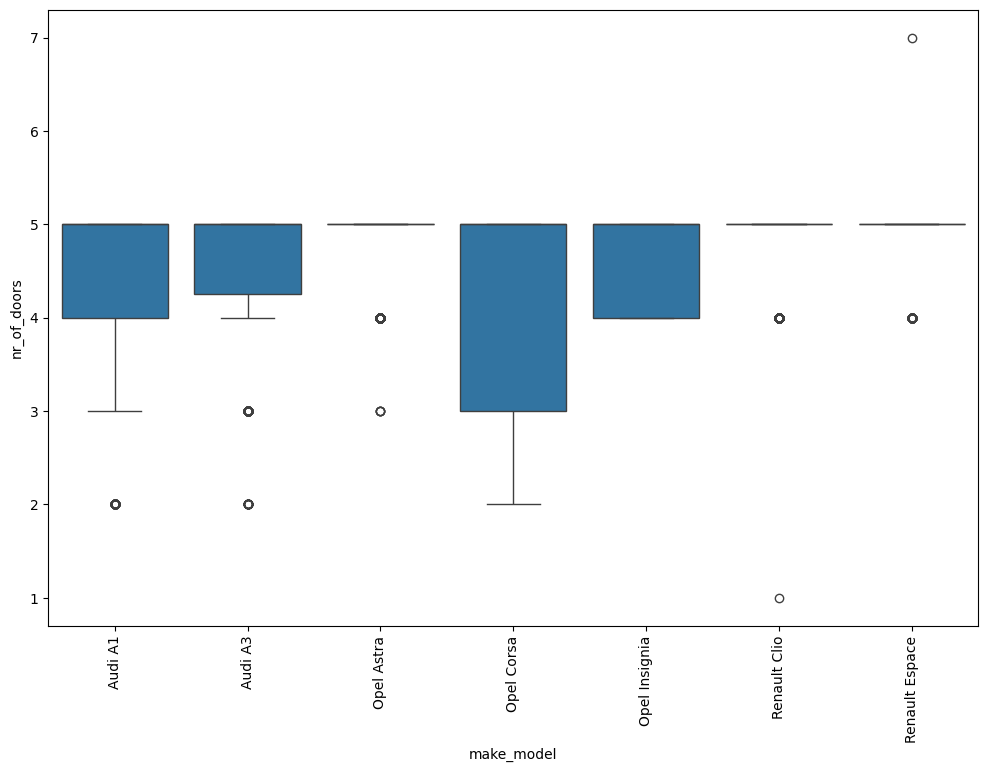

In [22]:
# plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='nr_of_doors', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()

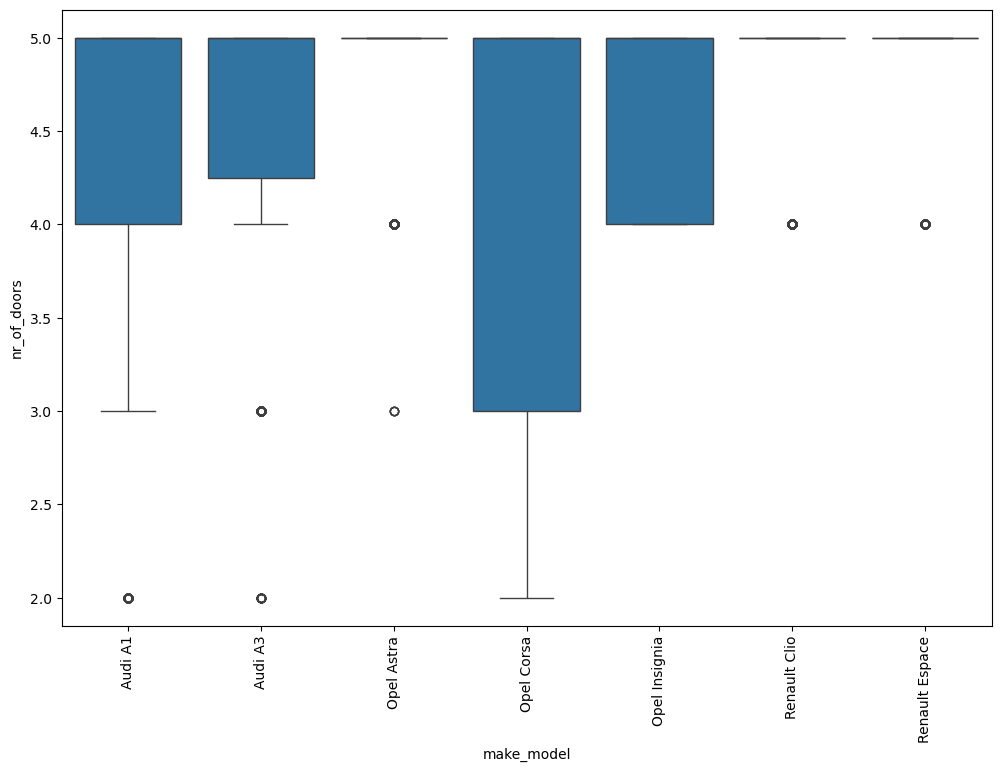

In [23]:
# Update 'nr_of_doors' for 'Renault Espace' with 7.0 doors to 5
df.loc[(df['make_model'] == 'Renault Espace') & (df['nr_of_doors'] == 7.0), 'nr_of_doors'] = 5

# Update 'nr_of_doors' for 'Renault Clio' with 1.0 door to 4
df.loc[(df['make_model'] == 'Renault Clio') & (df['nr_of_doors'] == 1.0), 'nr_of_doors'] = 4

# Check the updates
# plot again
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='nr_of_doors', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()

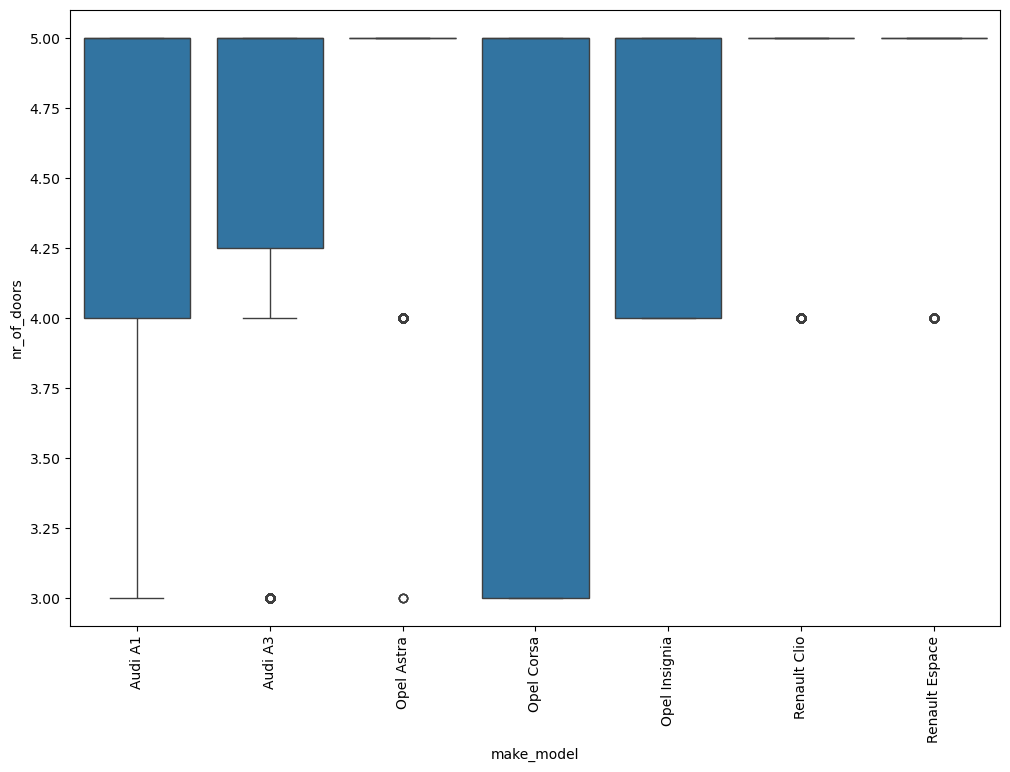

In [24]:
# Update 'nr_of_doors' for 'Audi A1', 'Audi A3', 'Opel Corsa' with 2.0 doors to 3.0
df.loc[(df['make_model'].isin(['Audi A1', 'Audi A3', 'Opel Corsa'])) & (df['nr_of_doors'] == 2.0), 'nr_of_doors'] = 3.0

# Check the updates
# plot again
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='nr_of_doors', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()


## nr_of_seats

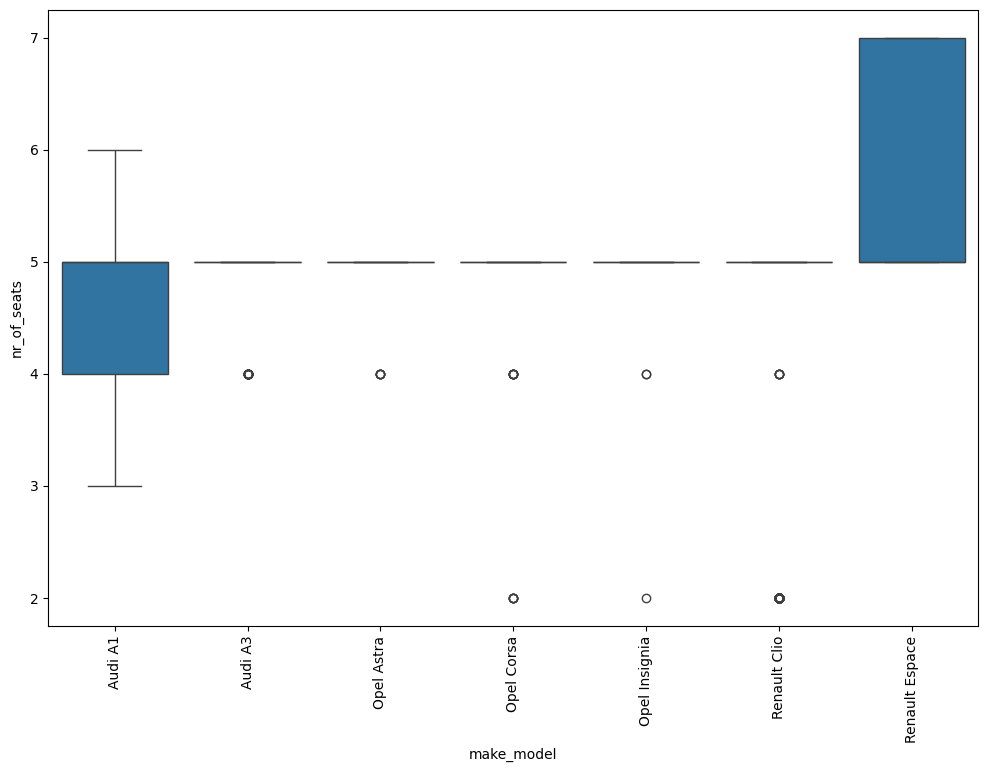

In [25]:
# plot 
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='nr_of_seats', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()

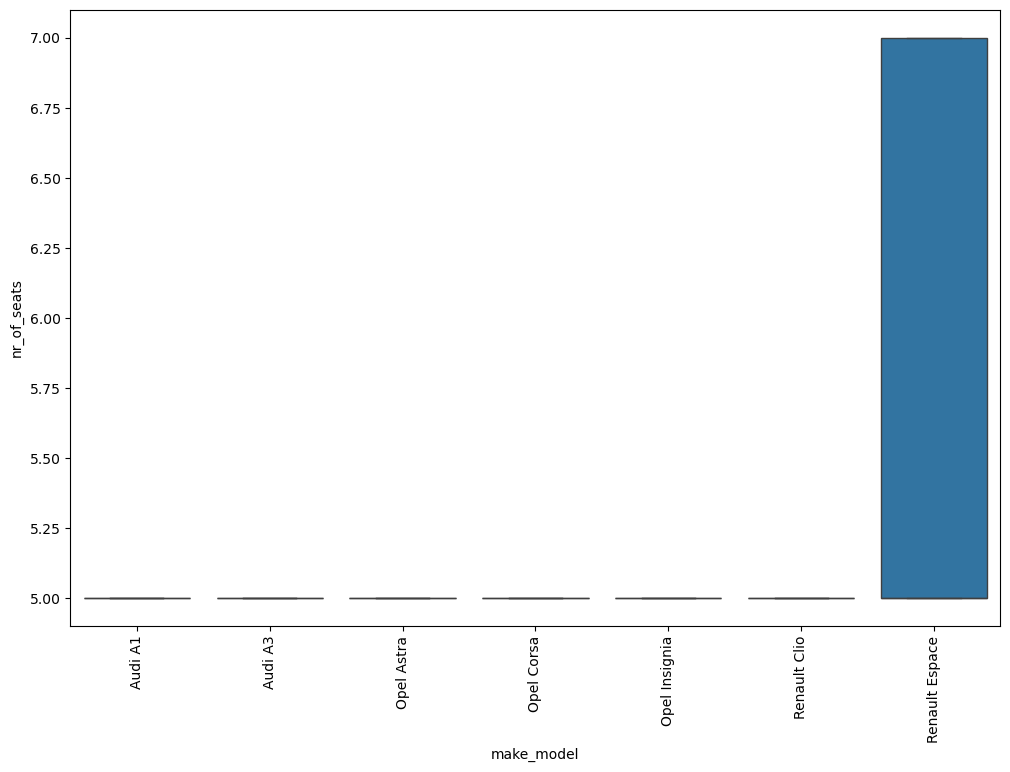

In [26]:
# Update 'nr_of_seats' to 5 for all make_model except 'Renault Espace'
df.loc[df['make_model'] != 'Renault Espace', 'nr_of_seats'] = 5

# plot 
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='nr_of_seats', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()

## gearing type

In [27]:
df['gearing_type'].value_counts()

gearing_type
Manual            8105
Automatic         7241
Semi-automatic     443
Name: count, dtype: int64

In [28]:
# Replace 'Semi-automatic' with 'Automatic'
df['gearing_type'] = df['gearing_type'].replace('Semi-automatic', 'Automatic')

# Check the updated column
df['gearing_type'].value_counts()

gearing_type
Manual       8105
Automatic    7684
Name: count, dtype: int64

## displacement

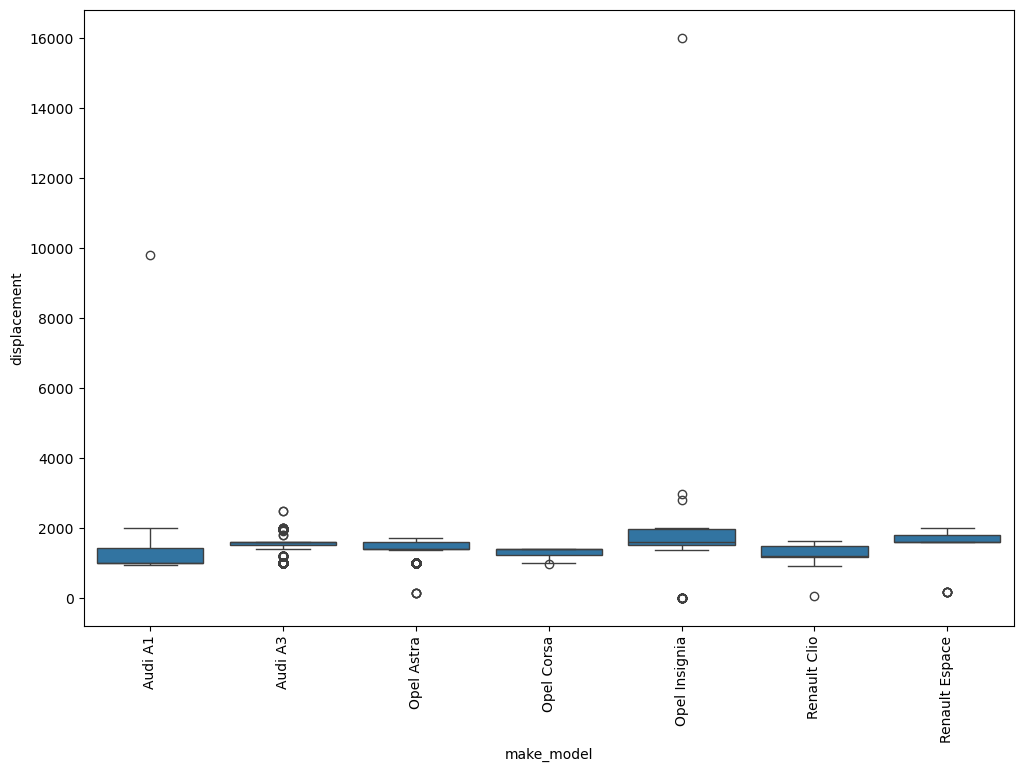

In [29]:
# plot 
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='displacement', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()

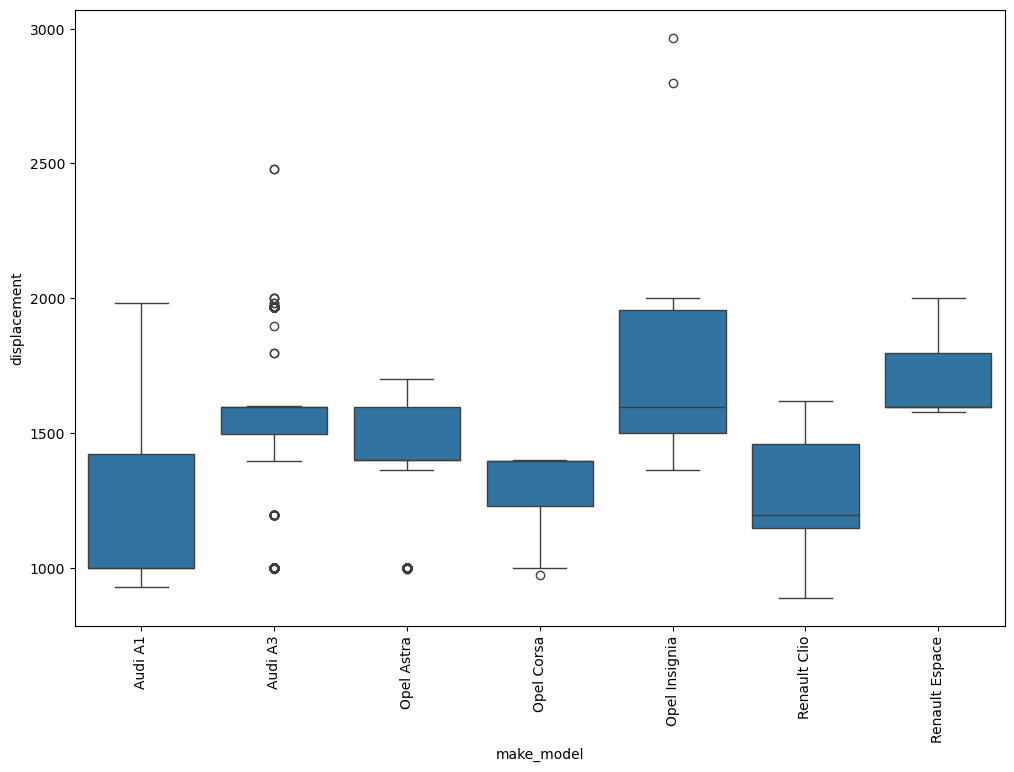

In [30]:
# Drop rows where 'displacement' is greater than 4000
df = df[df['displacement'] <= 4000]

# Drop rows where 'displacement' is less than 500
df = df[df['displacement'] >= 500]

# plot again
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='displacement', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()

## cylinders

In [31]:
df['cylinders'].value_counts()

cylinders
4.0    12315
3.0     3427
5.0        4
6.0        3
8.0        2
2.0        2
1.0        1
Name: count, dtype: int64

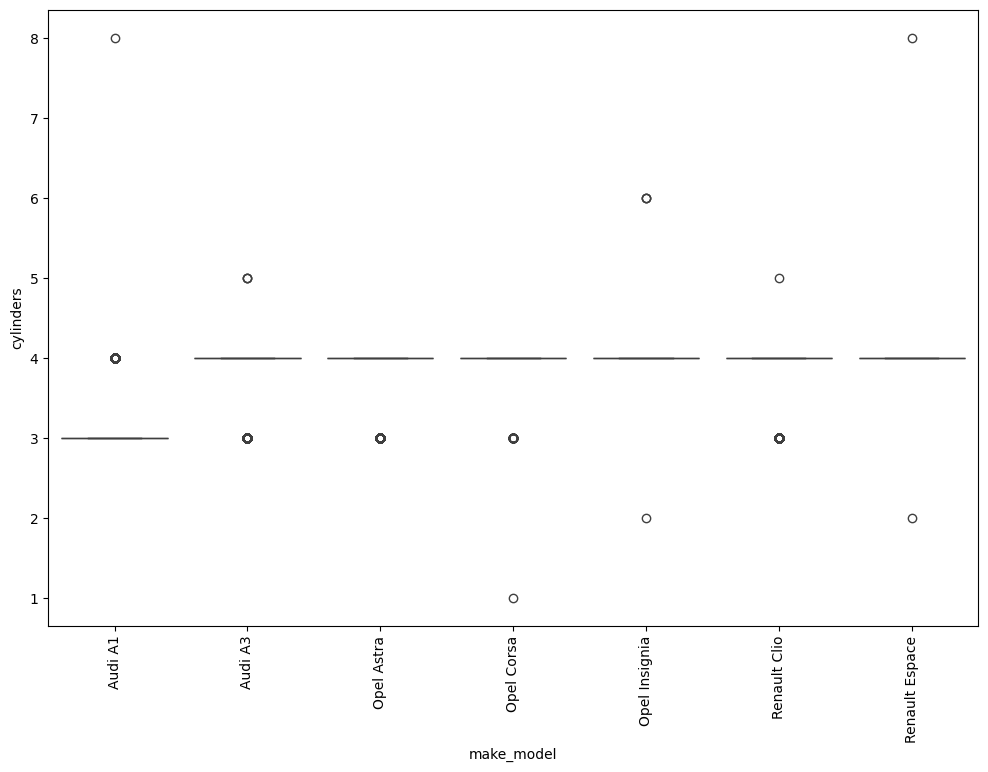

In [32]:
# plot 
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='cylinders', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()

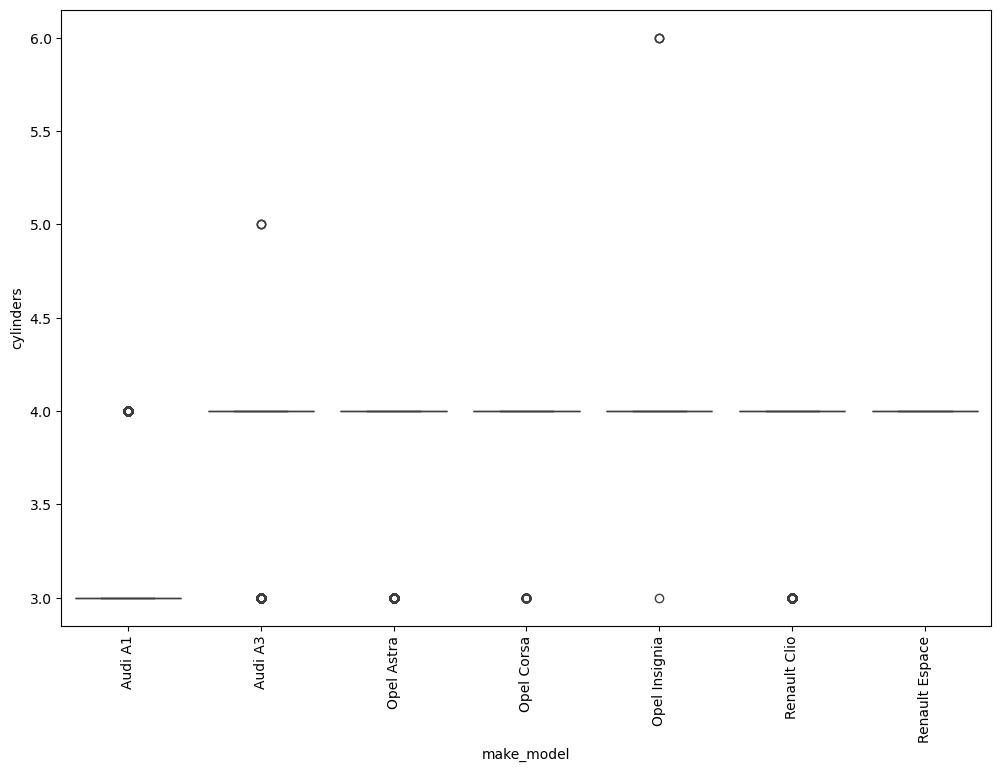

In [33]:
# Update 'cylinders' for 'Audi A1' from 8.0 to 4.0
df.loc[(df['make_model'] == 'Audi A1') & (df['cylinders'] == 8.0), 'cylinders'] = 4.0

# Update 'cylinders' for 'Renault Espace' from 2.0 and 8.0 to 4.0
df.loc[(df['make_model'] == 'Renault Espace') & (df['cylinders'].isin([2.0, 8.0])), 'cylinders'] = 4.0

# Update 'cylinders' for 'Opel Corsa' from 1.0 to 3.0
df.loc[(df['make_model'] == 'Opel Corsa') & (df['cylinders'] == 1.0), 'cylinders'] = 3.0

# Update 'cylinders' for 'Opel Insignia' from 2.0 to 3.0
df.loc[(df['make_model'] == 'Opel Insignia') & (df['cylinders'] == 2.0), 'cylinders'] = 3.0

# Update 'cylinders' for 'Renault Clio' from 5.0 to 4.0
df.loc[(df['make_model'] == 'Renault Clio') & (df['cylinders'] == 5.0), 'cylinders'] = 4.0

# Check the updates
# plot again
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='cylinders', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()


## weight

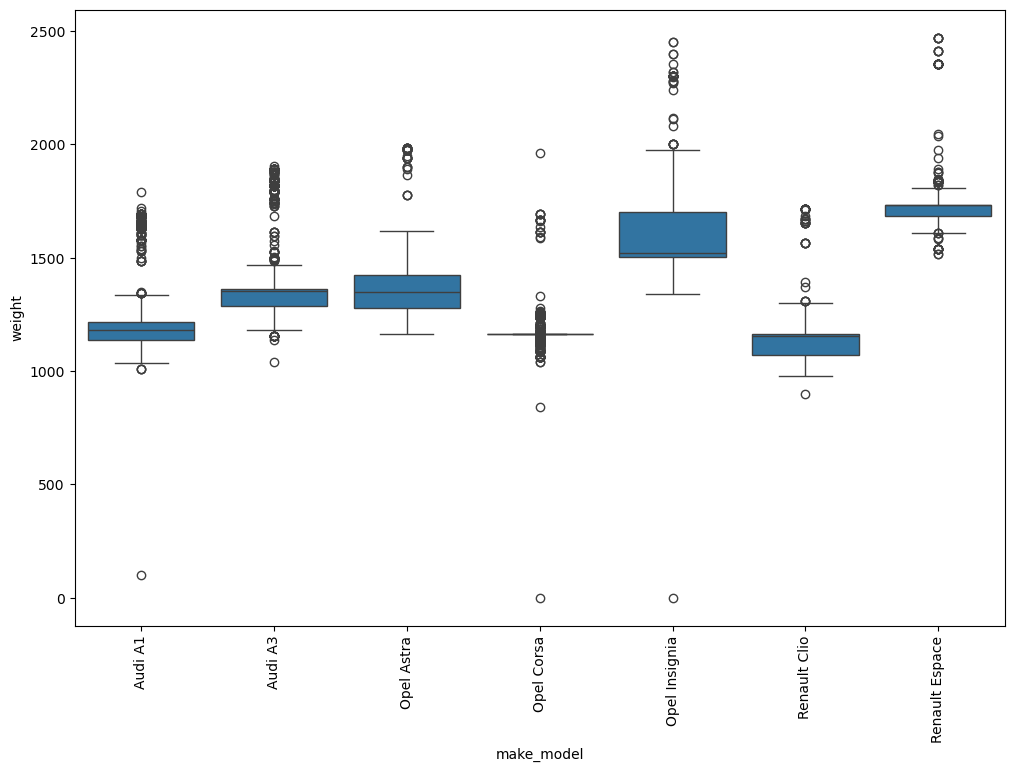

In [34]:
# plot 
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='weight', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()

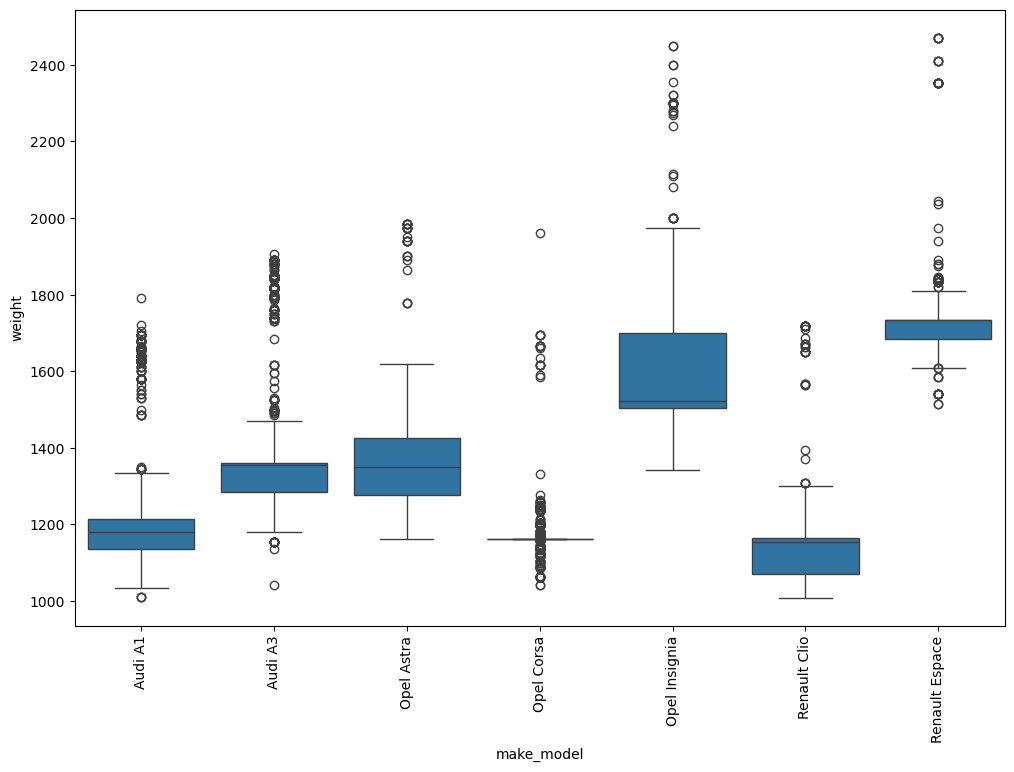

In [35]:
# Drop rows where 'weight' is less than 1000
df = df[df['weight'] >= 1000]

# plot again
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='weight', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [36]:
df = df.drop(columns=['Weight'])

## drive train

In [37]:
# no change
df['drive_chain'].value_counts()

drive_chain
front    15542
4WD        148
rear         4
Name: count, dtype: int64

## co2 emission

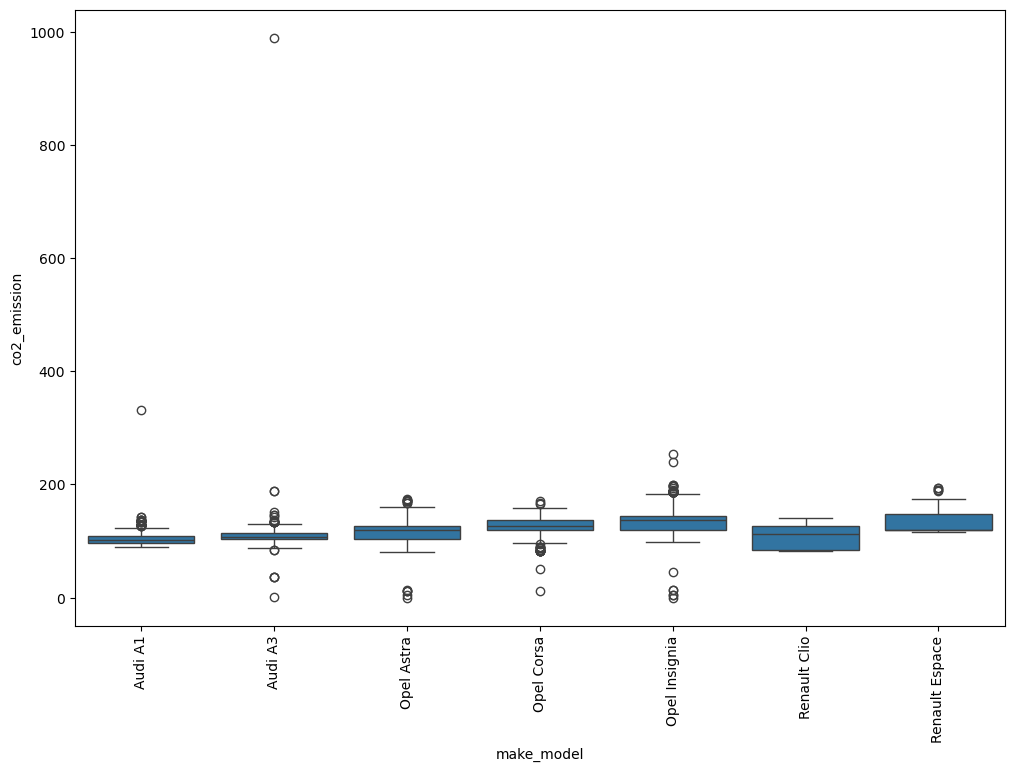

In [38]:
# plot 
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='co2_emission', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()

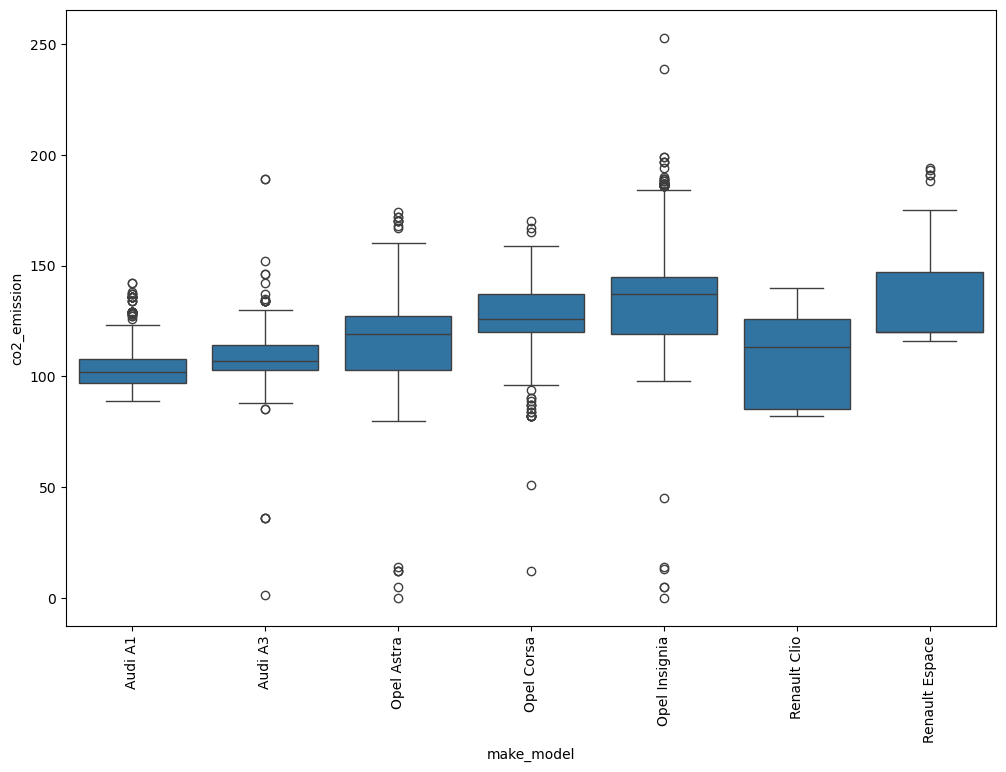

In [39]:
# Drop rows where 'co2_emission' is less than 300
df = df[df['co2_emission'] <= 300]

# plot again
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='co2_emission', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()

## emission_class

In [40]:
# no change, drop
df['emission_class'].value_counts()

emission_class
Euro 6    15609
Euro 5       77
Euro 4        6
Name: count, dtype: int64

In [41]:
df = df.drop(columns=['emission_class'])

## Drop comfort, entertainment, extras, safety

In [42]:
df = df.drop(columns=['comfort_convenience','entertainment_media','extras','safety_security'])

## gears

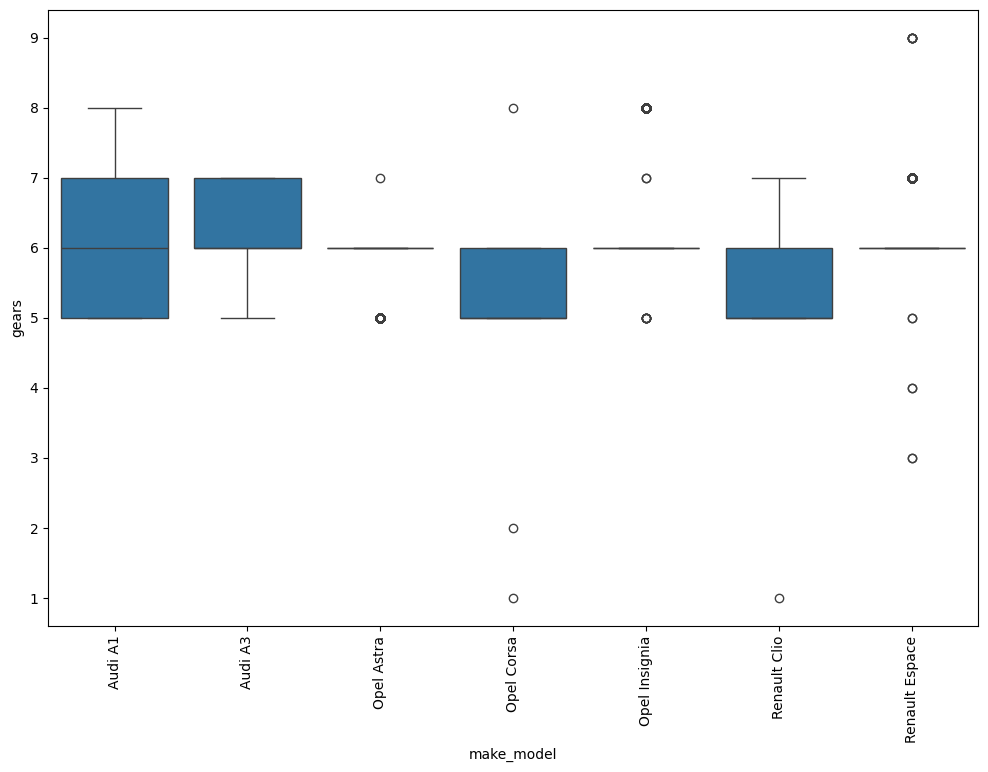

In [43]:
# Drop rows where 'gears' is less than 300
df = df[df['gears'] <= 10]

# plot 
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='gears', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()

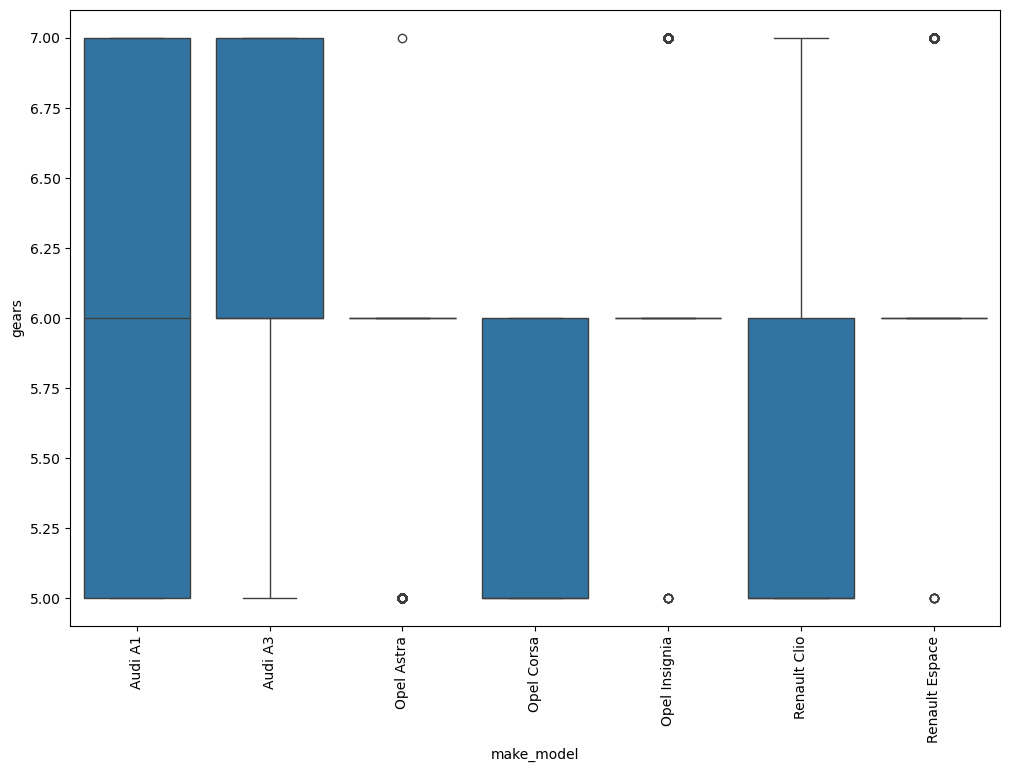

In [44]:
# Update 'gears' for 'Opel Corsa'
df.loc[(df['make_model'] == 'Opel Corsa') & (df['gears'] == 1.0), 'gears'] = 5.0
df.loc[(df['make_model'] == 'Opel Corsa') & (df['gears'] == 2.0), 'gears'] = 5.0
df.loc[(df['make_model'] == 'Opel Corsa') & (df['gears'] == 8.0), 'gears'] = 6.0

# Update 'gears' for 'Opel Insignia'
df.loc[(df['make_model'] == 'Opel Insignia') & (df['gears'] == 8.0), 'gears'] = 7.0

# Update 'gears' for 'Renault Clio'
df.loc[(df['make_model'] == 'Renault Clio') & (df['gears'] == 1.0), 'gears'] = 5.0

# Update 'gears' for 'Renault Espace'
df.loc[(df['make_model'] == 'Renault Espace') & (df['gears'].isin([3.0, 4.0])), 'gears'] = 5.0
df.loc[(df['make_model'] == 'Renault Espace') & (df['gears'] == 9.0), 'gears'] = 7.0

# Update 'gears' for 'Audi A1'
df.loc[(df['make_model'] == 'Audi A1') & (df['gears'] == 8.0), 'gears'] = 7.0

# Check the updates
# plot again
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='gears', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()


## electricity_consumption

In [45]:
# drop
df['electricity_consumption'].value_counts()

electricity_consumption
0    15554
1      137
Name: count, dtype: int64

In [46]:
df = df.drop(columns=['electricity_consumption'])

## age

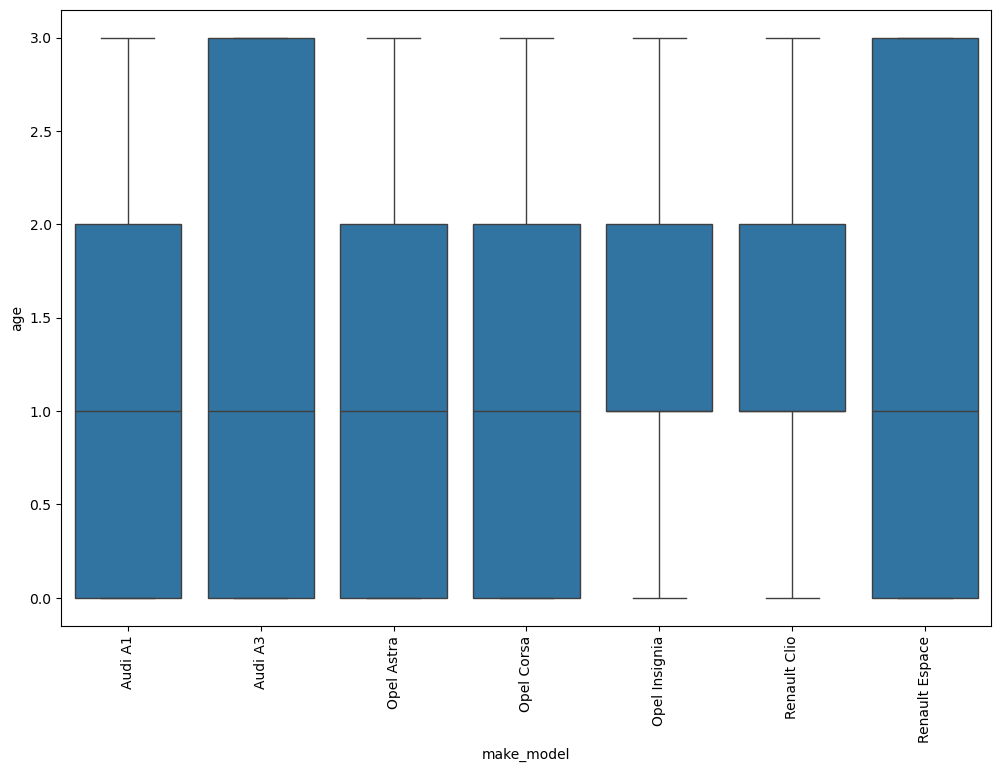

In [47]:
# no change
# plot 
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='age', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()

## new_used

In [48]:
df['new_used'].value_counts()

new_used
Used              11008
New                1596
Pre-registered     1331
Employee's car     1008
Demonstration       748
Name: count, dtype: int64

In [49]:
# Update 'new_used' column to 'Other' for any value that is not 'Used' or 'New'
df['new_used'] = df['new_used'].apply(lambda x: x if x in ['Used', 'New'] else 'Other')

# Check the updated column
df['new_used'].value_counts()

new_used
Used     11008
Other     3087
New       1596
Name: count, dtype: int64

## upholstery_material

In [50]:
df['upholstery_material'].value_counts()

upholstery_material
Cloth           8345
Part leather    1473
Full leather     967
Other            366
Velour            59
alcantara         56
Name: count, dtype: int64

In [51]:
# Replace 'Part leather' and 'Full leather' with 'Leather'
df['upholstery_material'] = df['upholstery_material'].replace(['Part leather', 'Full leather'], 'Leather')

# Replace 'Velour' and 'alcantara' with 'Other'
df['upholstery_material'] = df['upholstery_material'].replace(['Velour', 'alcantara'], 'Other')

# Check the updated column
df['upholstery_material'].value_counts()

upholstery_material
Cloth      8345
Leather    2440
Other       481
Name: count, dtype: int64

## consumptions

In [52]:
df['consumption_comb'].value_counts()

consumption_comb
5.4     1155
4.0      810
5.1      773
3.8      757
5.0      755
        ... 
55.0       1
9.1        1
11.0       1
7.5        1
38.0       1
Name: count, Length: 75, dtype: int64

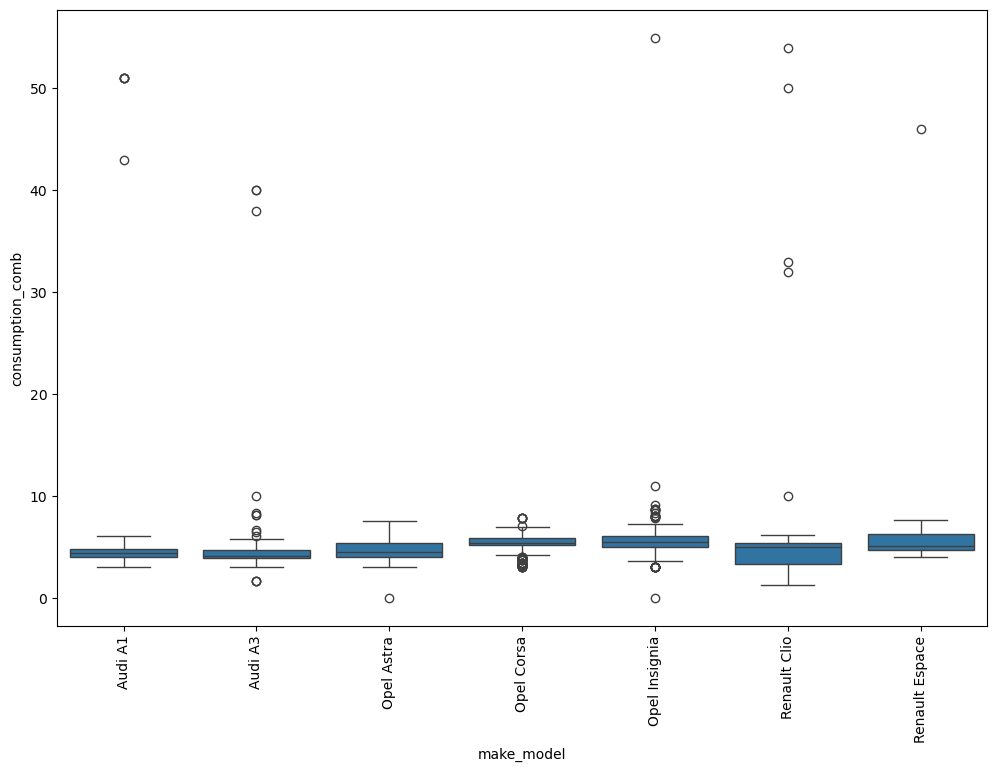

In [53]:
# plot 
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='consumption_comb', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()

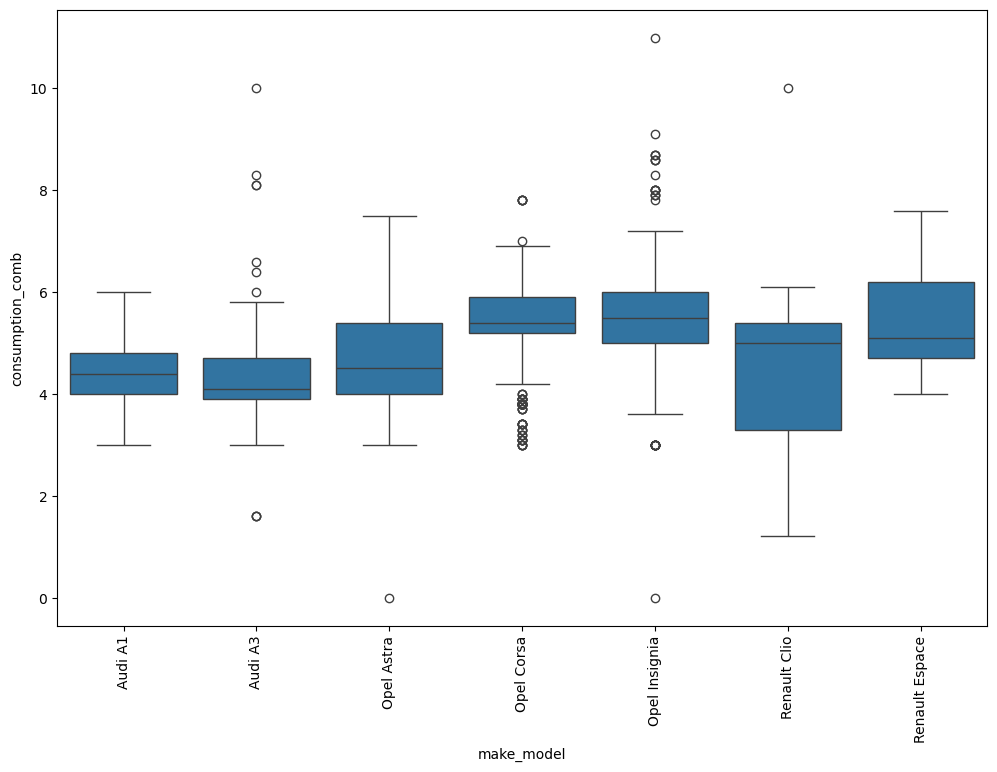

In [54]:
# Drop rows where 'consumption_comb' is greater than 20
df = df[df['consumption_comb'] <= 20]

# plot again
plt.figure(figsize=(12, 8))
sns.boxplot(x='make_model', y='consumption_comb', data=df)

# Rotate the x labels for better readability if there are many categories
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [55]:
# drop consumption_city and consumption_country
df = df.drop(columns=['consumption_city','consumption_country'])

## Modeling

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15677 entries, 0 to 15914
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15677 non-null  object 
 1   body_type            15677 non-null  object 
 2   price                15677 non-null  int64  
 3   vat                  15677 non-null  object 
 4   km                   15677 non-null  float64
 5   prev_owner           15677 non-null  object 
 6   hp                   15677 non-null  float64
 7   inspection_new       15677 non-null  object 
 8   warranty             15677 non-null  float64
 9   body_color           15677 non-null  object 
 10  paint_type           15677 non-null  object 
 11  nr_of_doors          15677 non-null  float64
 12  nr_of_seats          15677 non-null  float64
 13  gearing_type         15677 non-null  object 
 14  displacement         15677 non-null  float64
 15  cylinders            15677 non-null  floa

In [57]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'prev_owner', 'hp',
       'inspection_new', 'warranty', 'body_color', 'paint_type', 'nr_of_doors',
       'nr_of_seats', 'gearing_type', 'displacement', 'cylinders', 'weight',
       'drive_chain', 'co2_emission', 'gears', 'age', 'new_used', 'fuel_type',
       'upholstery_material', 'consumption_comb'],
      dtype='object')

In [58]:
cat_cols = ['make_model', 'body_type', 'vat', 'prev_owner',
       'inspection_new', 'body_color', 'paint_type', 'nr_of_doors',
       'nr_of_seats', 'gearing_type', 'cylinders',
       'drive_chain', 'gears', 'new_used', 'fuel_type',
       'upholstery_material']

numeric_cols = ['km', 'hp', 'warranty', 'displacement', 'weight',
       'co2_emission', 'gears', 'age', 'consumption_comb']

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the categorical and numeric columns
cat_cols = ['make_model', 'body_type', 'vat', 'prev_owner', 'inspection_new', 'body_color', 'paint_type', 
             'nr_of_doors', 'nr_of_seats', 'gearing_type', 'cylinders', 'drive_chain', 'gears', 
             'new_used', 'fuel_type', 'upholstery_material']

numeric_cols = ['km', 'hp', 'warranty', 'displacement', 'weight', 'co2_emission', 'age', 'consumption_comb']

# Separate features and target variable
X = df.drop(columns='price')
y = df['price']

# Define the preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

# Define the models
ridge_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', Ridge())])

lasso_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', Lasso())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and evaluate Ridge model
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("Ridge Regression")
print(f"Mean Squared Error: {ridge_mse}")
print(f"R^2 Score: {ridge_r2}\n\n")

# Fit and evaluate Lasso model
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Lasso Regression")
print(f"Mean Squared Error: {lasso_mse}")
print(f"R^2 Score: {lasso_r2}\n\n")

# Compare models
if ridge_r2 > lasso_r2:
    print("Ridge Regression performs better.")
else:
    print("Lasso Regression performs better.")


Ridge Regression
Mean Squared Error: 6723070.959094128
R^2 Score: 0.8648087788215081


Lasso Regression
Mean Squared Error: 6726607.656008025
R^2 Score: 0.8647376609681288


Ridge Regression performs better.
